# Homework V - Regression

### <font color='red'>__Question I__</font>
A series of measurements have been done on a vibrating system, which we can be simplified as a single degree-of-freedom. The stiffness of the system was changed and the time period of the system was measured. The data is recorded in a dataset and attached to this assingment with the name `Q1.csv`. This dataset includes stiffness values and the corresponding time period for the oscillation. Use <u>simple linear regression</u> to estimate the system's mass.

<font color='blue'>__NOTES :__</font>
- For a system with single degree-of-freedom, $\omega_n=\sqrt{\frac{k}{m}}$
- The time period of a system and its natural frequency are related with $\omega_n=\frac{2\pi}{T}$



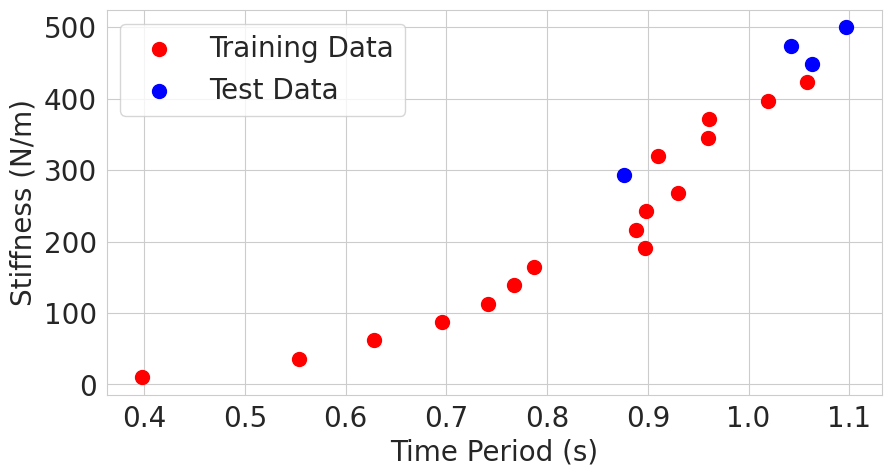

In [46]:
# Your code goes here
import numpy as np
import pandas as pd

q1_data = pd.read_csv('https://raw.githubusercontent.com/AlekTurkmen/ME-371/main/Q1.csv')

q1_data.head()

#normalize Time Period (s) data
q1_data['Time Period (s)'] = 1 / np.sqrt(q1_data['Time Period (s)'])
#note to self
#at end plug back into below equation, becuase data is normalized
#m = k / (2*np.pi/T)**2

#Let's develop a simple linear regression model, considering independent variable "Stiffness (N/m)" and dependent variable "Time Period (s)".
# importing required functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# defining the I.V. (feature) and Target Variable (Dependent variable)
x_datal=np.array(q1_data[['Time Period (s)']])   # I.V.
y_datal=np.array(q1_data[['Stiffness (N/m)']])      # Target Variable

# Splitting the data into train and test 80/20
x_trainl,x_testl,y_trainl,y_testl=train_test_split(
    x_datal,y_datal, test_size=.2, shuffle=True, random_state=100)

# Looking at the training and test data distribution
plt.figure(figsize=(10,5))
plt.scatter(x_trainl,y_trainl, s=100, color='r', label='Training Data')
plt.scatter(x_testl,y_testl, s=100, color='b',label='Test Data')
plt.xlabel('Time Period (s)')
plt.ylabel('Stiffness (N/m)')
plt.legend(loc='best');


In [51]:
# Define the instance of linear regression
lml = LinearRegression()

# Fitting the model to the training data
lml.fit(x_trainl,y_trainl)

# reporting the values of weights
w0l=lml.intercept_[0]  # w_0
w1l=lml.coef_[0][0]    # W-1
print(f'w_0={w0l:.3f} and w_1={w1l:.3f}')

# making prediction
yhatl = lml.predict(x_testl)
print(np.hstack([x_testl, yhatl]))

# Calculate m for each row in the estimates by using
#m = k / (2*np.pi/T)**2
m_values = (x_testl**2 * yhatl) / (4 * np.pi**2)

# Display final results
print("")
print("Final Estimates of System's Mass")
print(m_values) #4 estimates made

w_0=-354.042 and w_1=691.113
[[  1.06322407 380.76610476]
 [  1.09704235 404.13837083]
 [  0.87681574 251.93681089]
 [  1.04227887 366.29059586]]

Final Estimates of System's Mass
[[10.9030536 ]
 [12.32018246]
 [ 4.90623744]
 [10.07938189]]


### <font color='red'>__Question II__</font>

We are trying to model a system with two degrees of freedom (https://www.brown.edu/Departments/Engineering/Courses/En4/Notes/vibrations_mdof/vibrations_mdof.htm) based on some measurement data. We have the magnitude of input force and the corresponding maximum displacements of mass 1 and mass 2 for given input forces. The data is stored in the csv file `Q2.csv`.

- Use <u>Linear Regression</u> to develop a model to predict the magnitude of the input force if we know the displacements of mass 1 and mass 2.  

- Use evaluation metrics to assess the performance of your model. Is this a good model? Why? Run your model multiple times and look at the evaluation metrics. Do you see anything unusual about these metrics?

- What is the predicted force magnitude when mass 1 and mass 2 displacements both are 0.12 m ?

In [54]:
# Your code goes here
import numpy as np
import pandas as pd

q2_data = pd.read_csv('https://raw.githubusercontent.com/AlekTurkmen/ME-371/main/Q2.csv')

q2_data.head()

# importing required functions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# defining the I.V. and Target Variable (D.V.)
x_datam=np.array(q2_data[['Max_Disp_x2 (m)','Max_Disp_x1 (m)']])
y_datam=np.array(q2_data[['Input Force (N)']])

# Splitting the data into train and test 80/20
x_trainm, x_testm, y_trainm, y_testm=train_test_split(x_datam, y_datam, test_size=0.2, shuffle=True, random_state=10)

# Define the linear regression object
lmm = LinearRegression()

# Fitting the model to the training data
lmm.fit(x_trainm, y_trainm)

# reporting the values of weights
w0m=lmm.intercept_[0]  # w_0
w1m=lmm.coef_[0,0]     # w_1
w2m=lmm.coef_[0,1]     # w_2
print(f'w_0={w0m:0.2f}, w_1= {w1m:.2f} and w2={w2m:.2f}')

# making prediction
yhatm = lmm.predict(x_testm)
print(np.column_stack([x_testm, yhatm]))

w_0=0.06, w_1= 0.16 and w2=0.40
[[0.06615173 0.11567294 0.11324192]
 [0.04407483 0.13627818 0.11780917]
 [0.20529432 0.21114662 0.1738816 ]
 [0.18602683 0.17368124 0.15586319]
 [0.28007024 0.28475728 0.21532035]
 [0.12608852 0.05299675 0.09816955]
 [0.10336159 0.00792189 0.07656571]
 [0.159354   0.21159469 0.16654763]
 [0.10698698 0.07822468 0.1050578 ]
 [0.11836344 0.13070007 0.12774258]]


In [55]:
np.column_stack([y_testm, yhatm])

array([[0.16326531, 0.11324192],
       [0.12040816, 0.11780917],
       [0.18469388, 0.1738816 ],
       [0.17857143, 0.15586319],
       [0.19387755, 0.21532035],
       [0.11122449, 0.09816955],
       [0.05918367, 0.07656571],
       [0.14183673, 0.16654763],
       [0.07142857, 0.1050578 ],
       [0.06836735, 0.12774258]])

In [65]:
#Evaluation Metrics
# Mean Squared Error
from sklearn.metrics import mean_squared_error

MSEm = mean_squared_error(y_testm, yhatm)
print(f'The value of mean squared error is: {MSEm:.8f}')

# R2
from sklearn.metrics import r2_score

r2scorem = r2_score(y_testm, yhatm)
print(f'The value of R2 is: {r2scorem:.4f}')

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

MAEm=mean_absolute_error(y_testm, yhatm)
print(f'The value of mean absolute error is: {MAEm:.4f}')

The value of mean squared error is: 0.00093410
The value of R2 is: 0.6001
The value of mean absolute error is: 0.0256


The evalation metrics are showing surprisingly "accurate" results. However, I have a suspicion that since the values used in the experiment are low (~0.12, instead of something like 120) they have low MSE, R^2, and MAE values as a result.

In [88]:
# Your code goes here
import numpy as np
import pandas as pd

q2_data = pd.read_csv('https://raw.githubusercontent.com/AlekTurkmen/ME-371/main/q2_test.csv')

q2_data.head()

# importing required functions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# defining the I.V. and Target Variable (D.V.)
x_datam=np.array(q2_data[['Max_Disp_x2 (m)','Max_Disp_x1 (m)']])
y_datam=np.array(q2_data[['Input Force (N)']])

# Splitting the data into train and test 80/20
x_trainm, x_testm, y_trainm, y_testm=train_test_split(x_datam, y_datam, test_size=0.2, shuffle=True, random_state=10)

# Define the linear regression object
lmm = LinearRegression()

# Fitting the model to the training data
lmm.fit(x_trainm, y_trainm)

# reporting the values of weights
w0m=lmm.intercept_[0]  # w_0
w1m=lmm.coef_[0,0]     # w_1
w2m=lmm.coef_[0,1]     # w_2
print(f'w_0={w0m:0.2f}, w_1= {w1m:.2f} and w2={w2m:.2f}')

# making prediction
yhatm = lmm.predict(x_testm)
print(np.column_stack([x_testm, yhatm]))

w_0=0.10, w_1= 0.00 and w2=0.00
[[0.12 0.12 0.1 ]
 [0.12 0.12 0.1 ]
 [0.12 0.12 0.1 ]
 [0.12 0.12 0.1 ]]


When the values of mass 1 and mass 2 are the same, the predict values are simply the originaly Input Force from the csv file. In this case, I did 0.1 N for all, which ended up being the "predicted" values of Input Force.

### <font color='red'>__Question III__</font>

For this question, we will be using the a dataset that contains the data collected from a Combined Cycle Power Plant over 5 years, when the power plant was set to work with full load. The dataset is provided as an excel file named `CCPP_data.xlsx`. Features consist of hourly average ambient variables

- Ambient Temperature (AT) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (PE) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second.
  
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has effect on the Steam Turbine, the other three of the ambient variables effect the GT performance.


<font color='blue'>__Part (a) :__</font> First, provide a pairwise plot to observe the relationships between all the variables. Then, use the data in `Sheet 1` to develop a multiple linear regression that can predict electrical energy output (PE). Use all the features provided in the dataset to develop this model. Take 20% of the data for testing. And report both mean squared error and $R^2$ score for this model.


Pairwise Plot


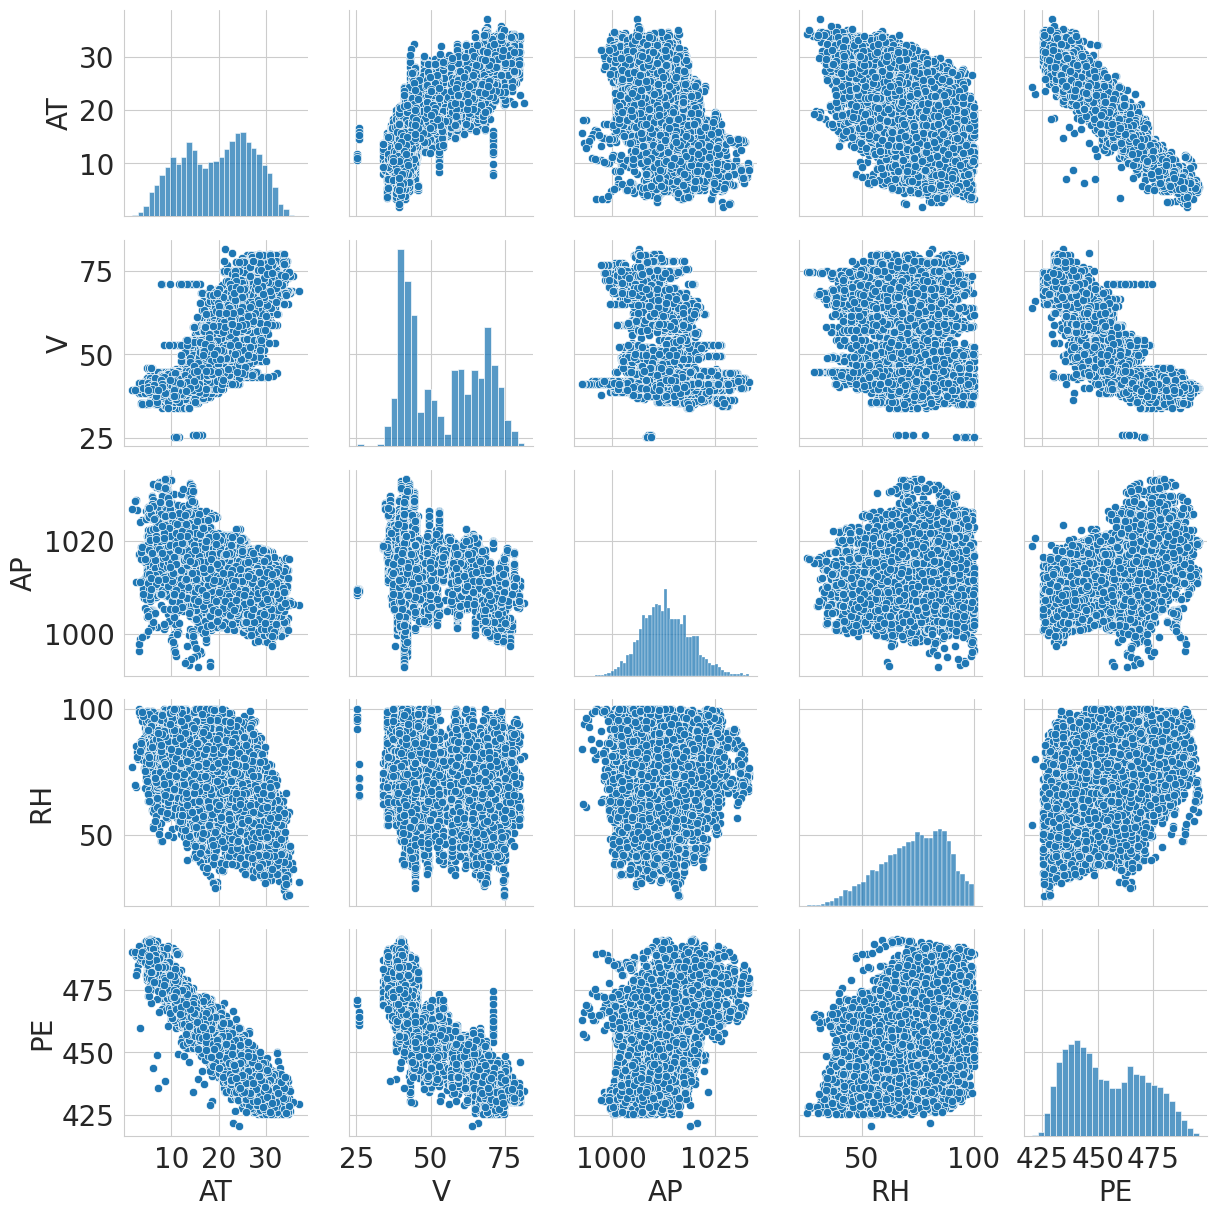


Predictions for Electrical Energy Output (PE)
[[439.14       441.03729709]
 [446.51       450.5160175 ]
 [481.89       480.80713742]
 ...
 [442.93       443.81508123]
 [444.23       444.36488185]
 [455.16       452.36315225]]

The value of mean squared error is: 21.78
The value of R2 is: 0.93


In [107]:
# Your code goes here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

q3_sheet1 = pd.read_csv('https://raw.githubusercontent.com/AlekTurkmen/ME-371/main/CCPP_data_sheet1.csv')

print('Pairwise Plot')
sns.pairplot(q3_sheet1)
plt.show()

# defining the I.V. and Target Variable (Dependat variable)
x_datam2=np.array(q3_sheet1[['AT','V','AP','RH']])
y_datam2=np.array(q3_sheet1[['PE']])

# Splitting the data into train and test 80/20
x_trainm2,x_testm2,y_trainm2,y_testm2 = train_test_split(x_datam2,y_datam2,test_size=0.2,shuffle=True, random_state=20)

# Define the linear regression object
lmm2 = LinearRegression()

# Fitting the model to the training data
lmm2.fit(x_trainm2,y_trainm2)

# reporting the values of weights
w0m2=lmm2.intercept_[0]
w1m2=lmm2.coef_[0,0]
w2m2=lmm2.coef_[0,1]
w3m2=lmm2.coef_[0,2]
w4m2=lmm2.coef_[0,3]
#print(f'w_0= {w0m2:.2f}, w_1={w1m2:.2f}, w_2={w2m2:.2f}, w_3={w3m2:.2f}, w_4={w4m2:.2f}')

# making prediction
yhatm2 = lmm2.predict(x_testm2)
np.column_stack([x_testm2, yhatm2])
print('')
print('Predictions for Electrical Energy Output (PE)')
print(np.column_stack([y_testm2, yhatm2]))

#Report MSE and R^2
MSEm2=mean_squared_error(y_testm2,yhatm2)
print('')

print(f'The value of mean squared error is: {MSEm2:.2f}')

r2scorem2 = r2_score(y_testm2,yhatm2)
print(f'The value of R2 is: {r2scorem2:.2f}')

<font color='blue'>__Part (b) :__</font> Develop a ridge regression model and a lasso regression model to predict the electrical energy output (PE). Still use the data in `Sheet 1` of the dataset for model development. Use all the features provided in the dataset to develop these models. Take 20% of the data for testing. And report both mean squared error and $R^2$ score for these models. Use regularization parameter $\lambda=10$.
- Compare the error and score of these models with the model you developed in part (a).
- Which feature is the most import feature for predicting PE using a regression algorithm?

In [110]:
# Your code goes here
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

lrg = Ridge(alpha=0.2)
lso = Lasso(alpha=0.2)

lrg.fit(x_trainm2, y_trainm2)
lso.fit(x_trainm2, y_trainm2)

yhat_ts_rg = lrg.predict(x_testm2)
yhat_tr_rg = lrg.predict(x_trainm2)

yhat_ts_ls = lso.predict(x_testm2)
yhat_tr_ls = lso.predict(x_trainm2)

print("Lasso Regression:")
rse2ndp_test_lso = r2_score(y_testm2, yhat_ts_ls)
print('R^2: %.2f' %rse2ndp_test_lso)
MSEm = mean_squared_error(y_testm2, yhat_ts_ls)
print(f'MSE: {MSEm:.2f}')

print('Ridge Regression')
rse2ndp_test_rg = r2_score(y_testm2, yhat_ts_rg)
print('R^2: %.2f' %rse2ndp_test_rg)
MSEm = mean_squared_error(y_testm2, yhat_ts_rg)
print(f'MSE: {MSEm:.2f}')

Lasso Regression:
R^2: 0.93
MSE: 21.79
Ridge Regression
R^2: 0.93
MSE: 21.78
